## **Questão 1**

#### **Explicando alguns termos**


##### **1) Backtest**

Backtest é o processo de testar uma estrátegia de investimentos ou modelo de trading usando dados históricos. O objetivo de um backtest é
avaliar como a estratégia elaborada teria se comportado no passado para, a partir disso, inferir como pode ser o potencial futuro dessa
estratégia.

##### **2) Dividendos**

Dividendos são pagamentos distribuidos por uma certa empresa a seus acionistas como uma parcela do lucro da empresa. Eles são uma forma de retorno de investimento para os acionistas e podem ser pagos em dinheiro ou em ações adicionais.

##### **3) Split**

Um split, ou split de ações, é um evento corporativo onde uma certa empresa decide dividir suas ações existentes em um número maior de ações. Isso geralmente é feito para tornar o preço dessas ações mais acessível aos investidores, sem alterar o valor total da empresa.

##### **4) Reverse split**

Um reverse split é um evento corporativo em que uma empresa reduz o número de suas ações em circulação ao consolidar várias ações existentes em uma única ação nova. Isso acaba resultando em um aumento no preço das ações de tal empresa, sem alterar o valor total de mercado da mesma.

##### **5) Spin-off**

Um spin-off é um evento corporativo em que uma empresa cria uma nova empresa independente, separando uma parte de seus negócios. Em tal evento, os acionistas da empresa original geralmente recebem ações da nova empresa, proporcionais a sua participação na empresa original.

##### **6) Adjustment close**

O adjustment close é basicamente o preço de uma ação ajustado a ocorrência de eventos corporativos como dividendos, splits, reverse splits e spin-offs. Esse tipo de ajuste é feito para fornecer uma visão mais precisa do desempenho de uma ação ao longo do tempo, levando em conta as mudanças que afetam o preço.

#### **Resolução da questão**

##### **Setup**

In [2]:
# Cria uma variável de configuração que conterá dados úteis na resolução das questões abaixo.
setup = {
    "start_date": "2018-01-01",
    "end_date": "2022-12-31",
    "tickers": ["VALE3.SA", "BBAS3.SA", "BBDC3.SA", "ITUB4.SA", "BPAC11.SA", "BPAN4.SA", "BSLI3.SA", "BMGB4.SA", "SANB11.SA", "BRBI11.SA"]
}

In [3]:
# Instala as bibliotecas que serão utilizadas na resolução das questões abaixo.
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
# Importa as bibliotecas que serão utilizadas na resolução das questões abaixo.
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### **Questão 1 - a)** 

*Obtenha os dados diários das ações da Vale (VALE3)*

In [5]:
def get_ticker_data(ticker, start_date, end_date):
    '''
        Description: Essa função é responsável por obter uma série de dados sobre as ações de uma determinada empresa em um certo período.
        
        Args:
            ticker (string): Identificador da empresa que se deseja obter os dados.
            start_date (string): Primeira data em que se deseja obter os dados sobre as ações da empresa.
            end_date (string): última data em que se deseja obter os dados sobre as ações da empesa.
        
        Return:
            data (pandas.DataFrame): DataFrame que contém os dados sobre as ações da empresa em questão.
    '''
    
    # Obtem o DataFrame que contém os dados sobre as ações da empresa solicitada.
    data = yf.download(ticker, start_date, end_date)
    
    # Retorna o DataFrame que contém os dados obtidos.
    return data

# Salva em uma variável o DataFrame que contém os dados solicitados.
data = get_ticker_data(setup["tickers"][0], setup["start_date"], setup["end_date"])


[*********************100%%**********************]  1 of 1 completed


In [6]:
# Exibo os dados obtidos.
print(data)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-01-02  40.439999  41.740002  40.439999  41.720001  26.179440  14156500
2018-01-03  41.830002  41.880001  41.299999  41.470001  26.022562  12744200
2018-01-04  41.810001  42.369999  41.520000  41.639999  26.129236  18433000
2018-01-05  41.570000  42.290001  41.310001  42.290001  26.537117  15251300
2018-01-08  42.400002  43.230000  42.400002  43.230000  27.126968  14542800
...               ...        ...        ...        ...        ...       ...
2022-12-23  85.279999  86.519997  85.080002  86.320000  77.709412  18656500
2022-12-26  86.419998  87.540001  86.330002  87.110001  78.420609  18407500
2022-12-27  88.000000  89.650002  87.470001  89.190002  80.293121  26720300
2022-12-28  89.190002  90.209999  88.699997  88.989998  80.113075  23314500
2022-12-29  89.000000  89.949997  88.830002  88.879997  80.014046  40110800

[1239 rows 

##### **Questão 1 - b)**
*Obtenha dados diários de um conjunto de 10 ações da B3 (inclua a VALE3 e escolha as outras 9); agrupe-as da forma que preferir. Depois, filtre para obter um dataframe apenas com o preço de fechamento ajustado*

In [8]:
def get_filtered_data():
    '''
        Description:
            Essa função retorna uma lista contendo todos os preços de fechamento ajustado de todas as empresas referentes aos
            tickers inseridos na variável de configuração "setup". O período que tais dados serão obtidos é o período entre o start_date 
            e o end_date inserido na variável de configuração "setup".
        Args:
            None
        Return:
            filtered_data (list): Lista contendo todos os preços de fechamento ajustado, conforme descrito acima.
    '''
    
    # Lista que armazenará todos os preços de fechamento ajustado.
    filtered_data = []

    # Itera sobre os tickers setados na variável de configuração "setup".
    for ticker in setup["tickers"]:
        # Para cada ticker, obtem dados sobre as ações da empresa referente a tal ticker entre o período "start_date" e "end_date".
        data = yf.download(ticker, setup["start_date"], setup["end_date"])
        # Salva os preços de fechamento ajustado entre o período "start_date" e "end_date" para o ticker em questão.
        filtered_data.append(data[['Adj Close']])
    
    # Retorna a lista contendo todos os preços de fechamento ajustado.
    return filtered_data


In [14]:
# Obtem a lista contendo todos os preços de fechamento ajustado para os tickers setados na variável de configuração "setup" entre o período
# "start_date" e "end_date" (também setados na variável de configuração "setup").
filtered_data = get_filtered_data()

# Concatena horizontalmente os dados obtidos na lista acima, transformando-os em um DataFrame do pandas.
concatened_data = pd.concat(filtered_data, axis=1, keys=[name for name in setup['tickers']], names=["Tickers"])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
def adjust_concatened_data(concatened_data):
    '''
        Description:
            Essa função tem o objetivo de ajustar os preços de fechamento de todas as empresas, fazendo com que, empresas que não possuam
            tais preços de fechamento para todas as datas entre o período "start_date" e "end_date" tenham 0 como valor de fechamento. Tal ajuste
            possui o intuito de fazer com que todas as empresas tenham algum número que represente o seu preço de fechamento, visando assim
            evitar problemas na hora de plotar gráficos.
        Args:  
            concatened_data (pandas.DataFrame): DataFrame que contém os preços de fechamento entre "start_date" e "end_date" de todas as empresas 
            que possuem seu ticker setado na variável de configuração "setup".
        Return:
            concatened_data (pandas.DataFrame): Retorna o mesmo DataFrame que foi recebido por parâmetro, porém, com o ajuste descrito na descrição
            dessa função.
    '''
    
    # Obtem o número de colunas do dataframe
    tickers_number = concatened_data.shape[1] 
    
    # Itera sobre cada ticker
    for i in range(tickers_number):
        # Se a empresa representada pelo ticker em questão não possuir todos os preços de fechamento entre "start_date" e "end_date", tais preços
        # não existentes serão setados como 0.
        concatened_data.iloc[:,i] = concatened_data.iloc[:,i].fillna(0)
    
    # Retorna o DataFrame que foi recebido por parâmetro, porém, com o ajuste descrito na descrição da função feito.
    return concatened_data

In [22]:
# Obtem o DataFrame com os preços de fechamento dos tickers setados na variável de configuração "setup" no período entre "start_date" e 
# "end_date" ajustado.
adjusted_data = adjust_concatened_data(concatened_data)

# Exibe o DataFrame obtido acima.
adjusted_data

Tickers,VALE3.SA,BBAS3.SA,BBDC3.SA,ITUB4.SA,BPAC11.SA,BPAN4.SA,BSLI3.SA,BMGB4.SA,SANB11.SA,BRBI11.SA
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,
2018-01-02,26.179440,10.871193,13.229095,21.514572,3.830503,1.526437,2.797653,0.000000,20.632015,0.000000
2018-01-03,26.022562,11.009846,13.285381,21.661671,3.866983,1.542589,2.797653,0.000000,20.461821,0.000000
2018-01-04,26.129236,11.115489,13.527307,22.112755,3.881170,1.518360,2.797653,0.000000,20.707666,0.000000
2018-01-05,26.537117,11.115489,13.531401,22.176489,3.945340,1.558742,2.797653,0.000000,20.928293,0.000000
2018-01-08,27.126968,11.141901,13.531401,22.102945,3.993684,1.582971,2.797653,0.000000,21.333410,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,77.709412,15.713290,11.620030,22.857912,23.483843,6.044343,17.366064,1.824207,25.461119,9.580054
2022-12-26,78.420609,15.691020,11.350406,22.404205,22.899145,5.927239,17.366064,1.798753,25.172197,9.486879


##### Questão 1 - c) 

*Faça um único gráfico contendo a série temporal do preço de fechamento ajustado de cada uma das 10 ações que você escolheu no item anterior.*

In [80]:
def plot_adjusted_close_prices(adjusted_data):
    '''
        Description:
            Esta função plota as séries temporais dos preços de fechamento ajustado de várias ações. As séries temporais são 
            geradas para cada ticker presente nas colunas do DataFrame `adjusted_data` e são plotadas entre o período "start_date"
            e "end_date" (ambas as variáveis são setadas na variável de configuração "setup").
        Args:
            adjusted_data (pandas.DataFrame): DataFrame contendo os preços de fechamento ajustado das ações, com tickers 
            como colunas e datas como índice. Cada coluna deve ser uma série temporal dos preços de fechamento ajustado 
            para um ticker específico.

        Return:
            None: A função exibe o gráfico gerado, mas não retorna nenhum valor.
    '''        

    # Obtem uma paleta de cores que será usada na plotagem das séries temporais.
    cmap = plt.get_cmap('plasma')
    # Obtem 10 cores igualmente espaçadas para serem usadas na plotagem das séries temporais, com intuito de gerar certa diferença entre
    # as cores de cada série temporal que será plotada.
    colors = [cmap(i) for i in np.linspace(0, 1, adjusted_data.shape[1])]

    # Obtem as datas entre "start_date" e "end_date". Tais datas serão o eixo x no gráfico contendo a série temporal do preço de
    # fechamento ajustado de cada uma das ações que possuem seus tickers setados na variável de configuração "setup".
    x_axis = adjusted_data.index

    # Cria a figura onde as séries temporais do preço de fechamento serão plotadas, colocando um fundo cinza claro em tal figura.
    plt.figure(figsize=(15,7), facecolor="lightgrey")

    # Itera sobre cada ticker, usando um índice i como auxiliar.
    for i,ticker in enumerate(adjusted_data.columns):
        # Para cada ticker, obtem os preços de fechamento ajustado entre o período "start_date" e "end_date". Tais preços serão o eixo y
        # de cada série temporal.
        y_axis = adjusted_data[ticker[0]].values.tolist()
        # Plota a série temporal do preço de fechamento ajustado do ticker em questão entre o período "start_date" e "end_date". Repare que
        # é adicionada uma legenda a cada série temporal indicando de qual empresa é tal série. Além disso, nessa parte do código as cores 
        # geradas no início dessa célula são utilizadas.
        plt.plot(x_axis, y_axis, label=ticker[0], color=colors[i])

    # Plota a legenda de cada série temporal.    
    plt.legend()

    # Cria a descrição do gráfico e de seus eixos.
    plt.title("Série temporal do preço de fechamento ajustado de algumas ações")
    plt.xlabel("Data")
    plt.ylabel("Valor da ação")

    # Exibe o gráfico
    plt.show()

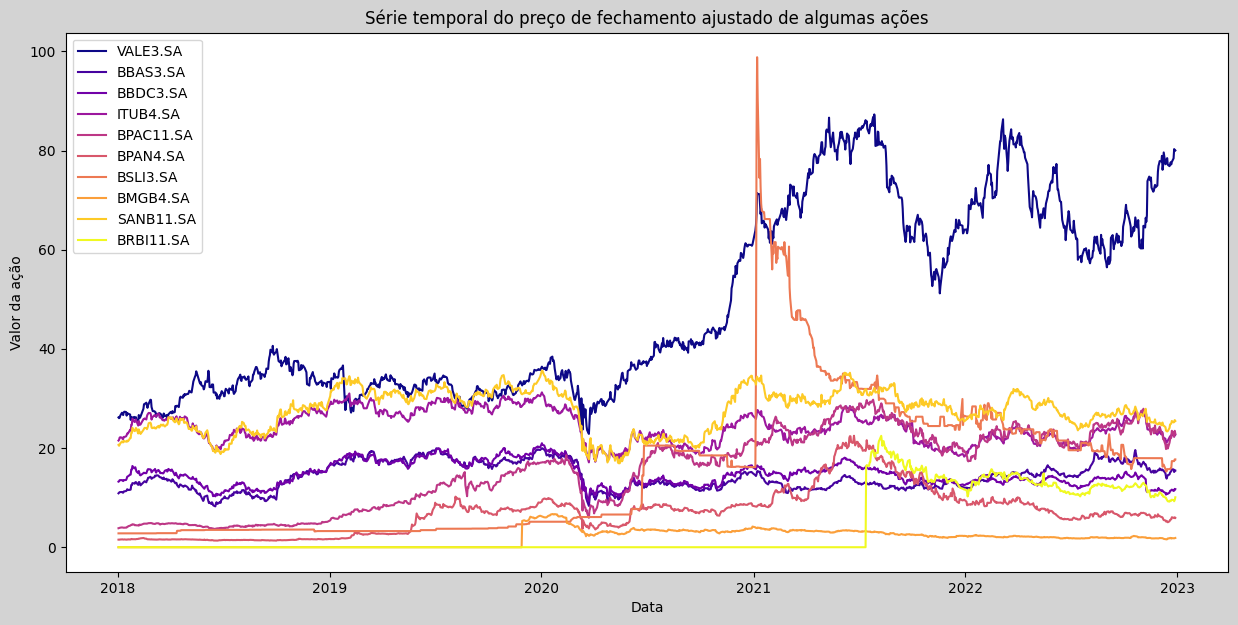

In [81]:
plot_adjusted_close_prices(adjusted_data)